In [5]:
!pip install seaborn pandas matplotlib numpy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 20)
%matplotlib inline


In [2]:
fnames = [
    # ("anvil", "nowcasts_anvil.csv"),
    ("steps", "nowcasts_steps.csv"),
    # ("sseps", "nowcasts_sseps.csv"),
]


In [19]:
results = {}

for mname, fname in fnames:

    data = pd.read_csv(f"C:/Users/davis.pazars/Documents/orkans/results/{fname}")
    data = data.drop_duplicates()
    data["data_date"] = pd.to_datetime(data["data_date"], format="%Y%m%d%H%M")

    data["date_offset"] = (
        data["data_date"].dt.month * 100 + data["data_date"].dt.day - 320
    ) % 1300

    data["season"] = pd.cut(
        data["date_offset"],
        [0, 300, 602, 900, 1300],
        labels=["spring", "summer", "autumn", "winter"],
    )

    data["date_str"] = data["data_date"].dt.strftime("%Y-%m-%d")

    results[mname] = data


In [20]:
results["steps"].head()


,id,precip_ratio,data_date,timestep,max_rrate,mean_rrate_above_thr,precip_above_2mmh,precip_above_5mmh,precip_above_8mmh,transform,boxcox_lambda,n_ens_members,n_cascade_levels,precip_thr,kmperpixel,extrap_method,decomp_method,bandpass_filter_method,noise_method,noise_stddev_adj,ar_order,vel_pert_method,conditional,probmatching_method,mask_method,seed,num_workers,fft_method,domain,extrap_kwargs,filter_kwargs,noise_kwargs,vel_pert_kwargs,mask_kwargs,measure_time,callback,return_output,nwc_type,metric_CSI_T60_THR0.1,metric_MAE_T60_THR0.1,metric_RMSE_T60_THR0.1,metric_RV_T60_THR0.1,metric_fss_tstep-1_thr0.1_s2,metric_fss_tstep-1_thr0.1_s8,metric_fss_tstep-1_thr0.1_s20,metric_roc_area_T60_THR0.1,metric_CSI_T60_THR0.5,metric_MAE_T60_THR0.5,metric_RMSE_T60_THR0.5,metric_RV_T60_THR0.5,metric_fss_tstep-1_thr0.5_s2,metric_fss_tstep-1_thr0.5_s8,metric_fss_tstep-1_thr0.5_s20,metric_roc_area_T60_THR0.5,nwc_run_time,total_run_time,date_offset,season,date_str
0,113bfe0b5ab7,0.940682,2023-01-19,15.0,3.55,0.413048,0.003459,0.0,0.0,NQ_transform,0.08,20,6,0.007294,2000.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True,ensemble,0.612477,0.225254,0.368199,0.246358,0.794299,0.829196,0.879912,0.936444,0.419889,0.225254,0.368199,0.246358,0.759549,0.814972,0.878927,0.950473,12.009392,25.525430,1099,winter,2023-01-19
1,2b6db7eda543,0.940682,2023-01-19,15.0,3.55,0.413048,0.003459,0.0,0.0,NQ_transform,0.08,22,6,0.007294,2000.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True,ensemble,0.620134,0.240938,0.387406,0.167845,0.802863,0.836920,0.886523,0.949738,0.386542,0.240938,0.387406,0.167845,0.728790,0.788897,0.863120,0.942417,6.740592,14.458061,1099,winter,2023-01-19
2,269fed73670e,0.940682,2023-01-19,15.0,3.55,0.413048,0.003459,0.0,0.0,NQ_transform,0.08,24,6,0.007294,2000.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True,ensemble,0.619527,0.233937,0.379714,0.200030,0.799302,0.833064,0.883202,0.948789,0.402790,0.233937,0.379714,0.200030,0.758484,0.813873,0.877543,0.953181,6.901845,14.126670,1099,winter,2023-01-19
3,dddcc18992f2,0.940682,2023-01-19,15.0,3.55,0.413048,0.003459,0.0,0.0,NQ_transform,0.08,26,6,0.007294,2000.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True,ensemble,0.609533,0.230038,0.376351,0.212442,0.798996,0.831221,0.879673,0.932426,0.412984,0.230038,0.376351,0.212442,0.772380,0.823443,0.880764,0.954794,7.394066,14.383581,1099,winter,2023-01-19
4,c1467476dafe,0.940682,2023-01-19,15.0,3.55,0.413048,0.003459,0.0,0.0,NQ_transform,0.08,28,6,0.007294,2000.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True,ensemble,0.615436,0.237254,0.386913,0.170219,0.798319,0.831812,0.882169,0.943046,0.404289,0.237254,0.386913,0.170219,0.770477,0.825001,0.885699,0.958354,7.960516,14.298681,1099,winter,2023-01-19


In [21]:
fss_metrics = [col for col in results[list(results.keys())[0]] if "fss" in col]
metrics = [col for col in results[list(results.keys())[0]] if "metric" in col]

metrics


['metric_CSI_T60_THR0.1',
 'metric_MAE_T60_THR0.1',
 'metric_RMSE_T60_THR0.1',
 'metric_RV_T60_THR0.1',
 'metric_fss_tstep-1_thr0.1_s2',
 'metric_fss_tstep-1_thr0.1_s8',
 'metric_fss_tstep-1_thr0.1_s20',
 'metric_roc_area_T60_THR0.1',
 'metric_CSI_T60_THR0.5',
 'metric_MAE_T60_THR0.5',
 'metric_RMSE_T60_THR0.5',
 'metric_RV_T60_THR0.5',
 'metric_fss_tstep-1_thr0.5_s2',
 'metric_fss_tstep-1_thr0.5_s8',
 'metric_fss_tstep-1_thr0.5_s20',
 'metric_roc_area_T60_THR0.5']

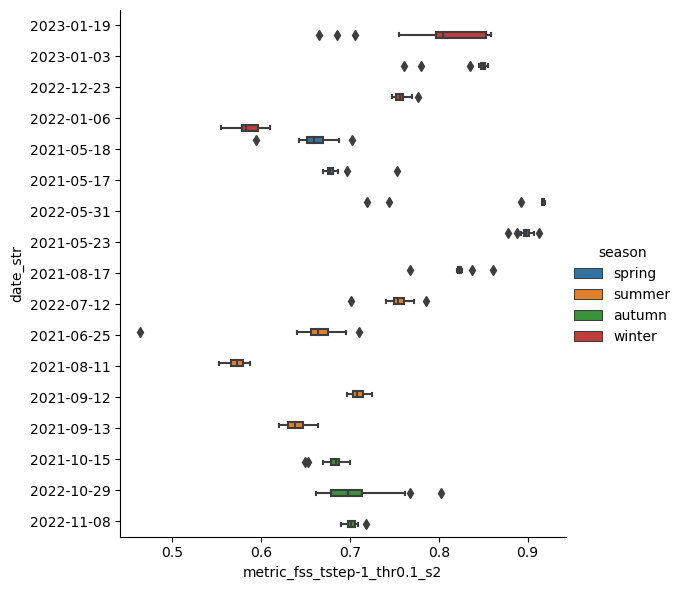

In [58]:
sns.catplot(
    data=results["steps"],
    y="date_str",
    x="metric_fss_tstep-1_thr0.1_s2",
    hue="season",
    kind="box",
    height=6,
    aspect=1,
)


[Text(29.140625, 0.5, 'Date')]

c:\Users\davis.pazars\AppData\Local\miniconda3\envs\nwc\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


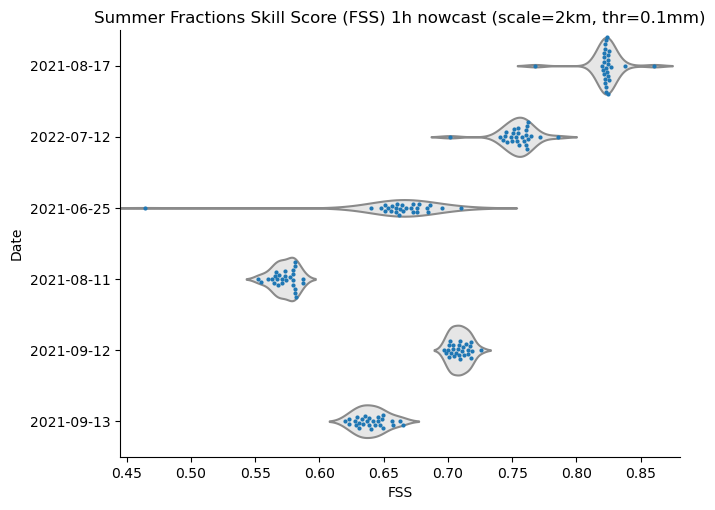

In [48]:
data = results["steps"].loc[results["steps"]["season"] == "summer"]

sns.catplot(
    data=data,
    y="date_str",
    x="metric_fss_tstep-1_thr0.1_s2",
    kind="violin",
    height=5,
    aspect=1.4,
    inner=None,
    color=".9",
)

ax = sns.swarmplot(
    data=data,
    y="date_str",
    x="metric_fss_tstep-1_thr0.1_s2",
    size=3,
)

ax.set_title("Summer Fractions Skill Score (FSS) 1h nowcast (scale=2km, thr=0.1mm)")
ax.set(xlabel="FSS")
ax.set(ylabel="Date")


In [49]:
# Load default model settings
model_name = "steps"

with open("C:/Users/davis.pazars/Documents/orkans/config.yaml", "r") as file:
    cfg = yaml.safe_load(file)

default_model_settings = cfg["model"][model_name]["manual"]

# Values in lists to properly create a DataFrame
for key, value in default_model_settings.items():
    default_model_settings[key] = [value]

default_settings = pd.DataFrame.from_dict(default_model_settings).squeeze()

remove_cols = [
    "precip_thr",
    "kmperpixel",
    "timestep",
    "measure_time",
    "callback",
    "seed",
    "return_output",
]

settings_names = list(set(default_model_settings.keys()) - set(remove_cols))
settings_names = [x for x in settings_names if "kwargs" not in x]
default_settings = default_settings[settings_names]

default_settings


bandpass_filter_method          gaussian
n_ens_members                         24
domain                           spatial
extrap_method             semilagrangian
decomp_method                        fft
vel_pert_method                      bps
mask_method                  incremental
n_cascade_levels                       6
fft_method                         numpy
noise_method               nonparametric
num_workers                            1
probmatching_method                  cdf
conditional                        False
ar_order                               2
noise_stddev_adj                    None
Name: 0, dtype: object

In [52]:
# Results for a particular model at a particular date (e.g. to check outliers)
data = results["steps"]
date = "2021-06-25"
metric = "metric_fss_tstep-1_thr0.1_s2"

values = data.loc[data["date_str"] == date, [metric] + settings_names].sort_values(
    by=metric, ascending=True
)

values


,metric_fss_tstep-1_thr0.1_s2,bandpass_filter_method,n_ens_members,domain,extrap_method,decomp_method,vel_pert_method,mask_method,n_cascade_levels,fft_method,noise_method,num_workers,probmatching_method,conditional,ar_order,noise_stddev_adj
321,0.464596,gaussian,24,spatial,semilagrangian,fft,bps,incremental,6,numpy,nonparametric,1,mean,False,2,NaN
313,0.640402,gaussian,24,spatial,semilagrangian,fft,bps,incremental,6,numpy,nonparametric,1,cdf,False,2,NaN
305,0.648195,gaussian,24,spatial,semilagrangian,fft,bps,incremental,6,numpy,nonparametric,1,cdf,False,2,NaN
309,0.650654,gaussian,24,spatial,semilagrangian,fft,bps,incremental,6,numpy,nested,1,cdf,False,2,NaN
302,0.650717,gaussian,24,spatial,semilagrangian,fft,bps,incremental,4,numpy,nonparametric,1,cdf,False,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.683722,gaussian,24,spatial,semilagrangian,fft,bps,sprog,6,numpy,nonparametric,1,cdf,False,2,NaN
303,0.684866,gaussian,24,spatial,semilagrangian,fft,bps,incremental,6,numpy,nonparametric,1,cdf,False,2,NaN
297,0.686025,gaussian,20,spatial,semilagrangian,fft,bps,incremental,6,numpy,nonparametric,1,cdf,False,2,NaN
319,0.695762,gaussian,24,spatial,semilagrangian,fft,bps,incremental,6,numpy,nonparametric,1,cdf,False,2,NaN


In [74]:
# Adjust this to exclude or include outliers
mean_metric = values.iloc[2:][metric].mean()

mean_metric


0.7678370461417012

In [65]:
default_settings.equals(values.iloc[0][settings_names])


True

<AxesSubplot: xlabel='season', ylabel='metric_fss_tstep-1_thr0.1_s2'>

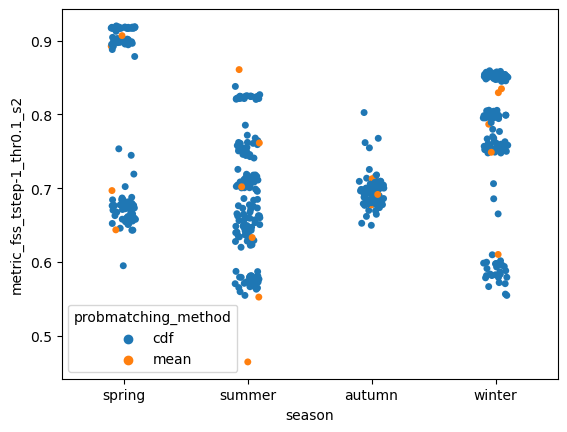

In [51]:
data = results["steps"]
param = "season"
hue_param = "probmatching_method"
metric = "metric_fss_tstep-1_thr0.1_s2"

sns.stripplot(data=data, x=param, y=metric, hue=hue_param)


In [ ]:
# Best settings by season
data = results[model_name]
fss_metrics = [col for col in data.columns if "fss" in col]

data[["season", "data_date", fss_metrics[0]] + settings_names].sort_values(
    by=["data_date", fss_metrics[0]], ascending=[True, False]
).groupby(["season", "data_date"]).head(1)


In [ ]:
data = results[model_name]

data.loc[
    data["date_str"] == "2021-05-17", settings_names + [metric, "data_date"]
].sort_values(by=metric, ascending=False).reset_index(drop=True)

for metric in metrics:

    best = data.loc[
        data["date_str"] == "2021-05-17", settings_names + [metric]
    ].sort_values(by=metric, ascending=False)

    def_res_sum = 0
    def_count = 0

    for index, row in best.iterrows():
        if default_settings.equals(row[settings_names]):
            def_res_sum += row[metric]
            def_count += 1

    def_mean = def_res_sum / def_count

    print(f"Metric: {metric}")
    print(f"Default settings mean result: {def_mean}\n")

    for index, row in best.iterrows():
        if not default_settings.equals(row[settings_names]):
            print(default_settings.compare(row[settings_names]))
            print(f"Default diff: {row[metric] - def_mean}")

    print("\n")


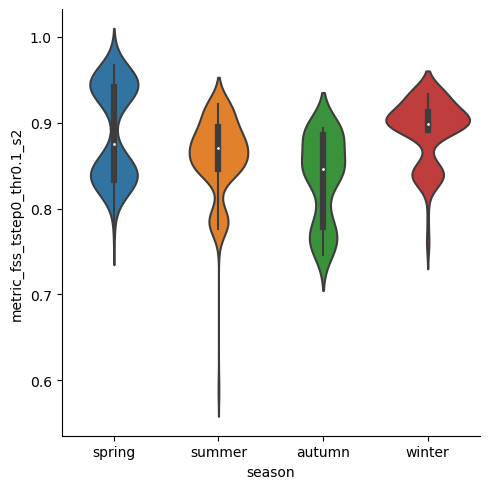

In [81]:
data = results[model_name]

sns.catplot(
    data=data,
    x="season",
    y="metric_fss_tstep0_thr0.1_s2",
    kind="violin",
)


In [ ]:
# What's the score metric difference between best and default settings?
data = results["steps"]
max_score = data.loc[
    data[fss_metrics[0]] == data[fss_metrics[0]].max(), settings_names
].reset_index(drop=True)


In [ ]:
# What settings differ between max scoring settings and default?
data = results["steps"]
max_score = data.loc[
    data[fss_metrics[0]] == data[fss_metrics[0]].max(), settings_names
].reset_index(drop=True)

default_settings.compare(max_score)


<AxesSubplot: >

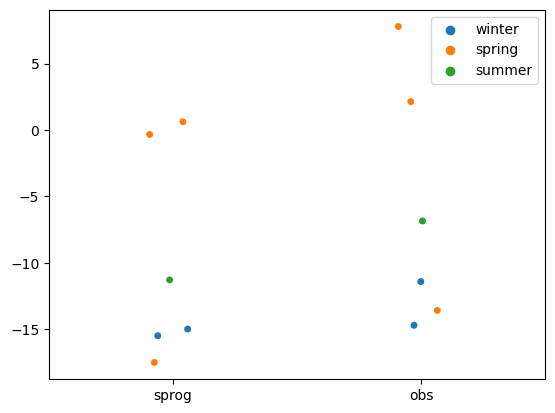

In [80]:
mask_methods = [
    "sprog",
    "obs",
    "sprog",
    "obs",
    "sprog",
    "obs",
    "sprog",
    "obs",
    "obs",
    "sprog",
    "sprog",
    "obs",
]

values = [
    -15.487959,
    -14.69775441,
    -14.98194458,
    -11.413447,
    -0.3424357069,
    7.786404342,
    -17.49948792,
    -13.58273175,
    2.134999312,
    0.619015728,
    -11.28694744,
    -6.847326293,
]

seasons = [
    "winter",
    "winter",
    "winter",
    "winter",
    "spring",
    "spring",
    "spring",
    "spring",
    "spring",
    "spring",
    "summer",
    "summer",
]

sns.stripplot(x=mask_methods, y=values, hue=seasons)
